In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive"

 AAdhar.docx			   report1.html
'Colab Notebooks'		   report.pdf
'Driving License.docx'		  'Sathabhishekam 30.07.2017.zip'
'Image Recpgnition'		   Screenshot_2015-10-28-15-17-34.png
 Kodai				  'test (1).ipynb'
'MANITHANEYAM IDENTITY CARD.xps'   Untitled1.ipynb
'Pan Card.docx'


In [5]:
!ls "/content/drive/My Drive/Image Recpgnition"

images	test_vc2kHdQ.csv  train.csv


In [6]:
import pandas as pd
import numpy as np

In [7]:
train_data=pd.read_csv('/content/drive/My Drive/Image Recpgnition/train.csv')

In [8]:
train_data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [9]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [10]:
import keras

Using TensorFlow backend.


In [11]:
from keras.preprocessing import image

In [12]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [13]:
from tqdm import tqdm

In [14]:
from PIL import Image

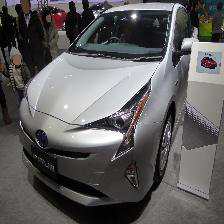

In [15]:
load_img('/content/drive/My Drive/Image Recpgnition/images/1503.jpg')

In [16]:
train_image=[]

In [17]:
for i in tqdm(range(train_data.shape[0])):
  img=image.load_img('/content/drive/My Drive/Image Recpgnition/images/'+train_data['image_names'][i],target_size=(224,224),grayscale=False)
  img=img_to_array(img)
  img=img/255
  train_image.append(img)



100%|██████████| 1646/1646 [13:37<00:00,  2.01it/s]


In [18]:
X=np.array(train_image)

In [19]:
X.shape

(1646, 224, 224, 3)

In [21]:
y=train_data['emergency_or_not']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [38]:
from keras.models import Model,Sequential

from keras.layers import Dense,Flatten

from keras.applications.vgg16 import VGG16


In [39]:
from keras.callbacks import EarlyStopping

In [40]:
vgg=VGG16(include_top=False,input_shape=(224,224,3),pooling='max',weights='imagenet')

In [41]:
for i in vgg.layers:
  i.trainable=False

In [42]:
pred=Dense(1,activation='sigmoid')(vgg.output)

In [43]:
model=Model(inputs=vgg.input,outputs=pred)

In [44]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [45]:
from keras.optimizers import Adam

In [46]:
adam=Adam()

In [47]:
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
early=EarlyStopping(patience=20,monitor='val_accuracy')

In [51]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[early])

Train on 1152 samples, validate on 494 samples
Epoch 1/50
1152/1152 [==============================] - 16s 14ms/step - loss: 0.6380 - accuracy: 0.6302 - val_loss: 0.5499 - val_accuracy: 0.7449
Epoch 2/50
1152/1152 [==============================] - 15s 13ms/step - loss: 0.5071 - accuracy: 0.7682 - val_loss: 0.4813 - val_accuracy: 0.7773
Epoch 3/50
1152/1152 [==============================] - 15s 13ms/step - loss: 0.4455 - accuracy: 0.8003 - val_loss: 0.4263 - val_accuracy: 0.8178
Epoch 4/50
1152/1152 [==============================] - 15s 13ms/step - loss: 0.4021 - accuracy: 0.8385 - val_loss: 0.3952 - val_accuracy: 0.8360
Epoch 5/50
1152/1152 [==============================] - 15s 13ms/step - loss: 0.3767 - accuracy: 0.8411 - val_loss: 0.3694 - val_accuracy: 0.8381
Epoch 6/50
1152/1152 [==============================] - 15s 13ms/step - loss: 0.3510 - accuracy: 0.8620 - val_loss: 0.3565 - val_accuracy: 0.8462
Epoch 7/50
1152/1152 [==============================] - 15s 13ms/step - loss:

In [52]:
ta=history.history['accuracy']

In [53]:
va=history.history['val_accuracy']

In [54]:
vl=history.history['val_loss']

In [55]:
tl=history.history['loss']

In [56]:
import matplotlib.pyplot as plt


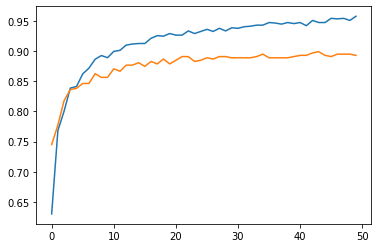

In [57]:
plt.plot(ta)
plt.plot(va)

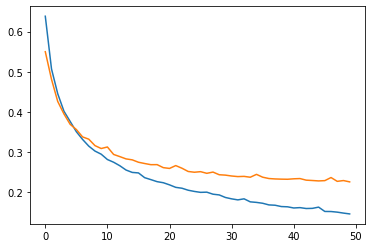

In [58]:
plt.plot(tl)
plt.plot(vl)

In [92]:
test_data=pd.read_csv('/content/drive/My Drive/Image Recpgnition/test_vc2kHdQ.csv')

In [93]:
test_data.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [94]:
test_image=[]

In [95]:
for i in tqdm(range(test_data.shape[0])):
  img=image.load_img('/content/drive/My Drive/Image Recpgnition/images/'+test_data['image_names'][i],target_size=(224,224),grayscale=False)
  img=img_to_array(img)
  img=img/255
  test_image.append(img)
test_pro=np.array(test_image)  


100%|██████████| 706/706 [00:02<00:00, 323.77it/s]


In [96]:
test_pro.shape

(706, 224, 224, 3)

In [98]:
model.predict(test_pro).astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [74]:
len(out)

706

In [75]:
for i in range(len(out)):
  if out[i]>0:
    out[i]=1
  else:
    out[i]=0  

In [76]:
out[1]

array([1.], dtype=float32)

In [78]:
predictions=out.astype(int)

In [79]:
len(predictions)

706

In [81]:
result=pd.DataFrame(predictions)

In [86]:
result.rename(columns={0:'emergency_or_not'},inplace=True)

In [88]:
vgg_result=pd.concat([test_data,result],axis='columns')

In [90]:
vgg_result['emergency_or_not'].value_counts()

1    706
Name: emergency_or_not, dtype: int64

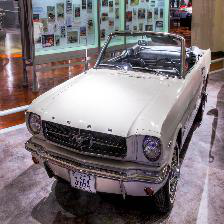

In [91]:
load_img('/content/drive/My Drive/Image Recpgnition/images/1960.jpg')

In [99]:
train_data['emergency_or_not'].value_counts()

0    965
1    681
Name: emergency_or_not, dtype: int64